In [1]:
import pandas as pd

In [2]:
df_boston=pd.read_csv('sample_data/Boston House Prices.csv')
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


**1 Multiple linear regression**

In [3]:
import statsmodels.api as sm

**1.1 Define the dependant and the independent variables**

In [10]:
#dependant
y=df_boston['Value']

#independent variables- They are more than one
x=df_boston[['Rooms', 'Distance']]

**1.2 Making the regression: Adding a constant and fitting the model**

In [11]:
#adding a constant which is the dependant variable
x=sm.add_constant(x)

#fitting the model- We add the independent variables
lm=sm.OLS(y,x).fit()


In [12]:
#the table reveals how good or bad our model is
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.84e-75
Time:                        09:47:06   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

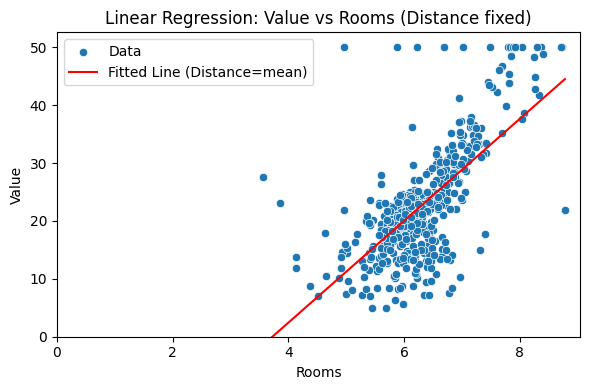

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create prediction data: Rooms varies, Distance fixed at its mean
rooms_range = pd.Series(sorted(df_boston['Rooms'].unique()))
distance_mean = df_boston['Distance'].mean()

x_pred = pd.DataFrame({
    'const': 1,
    'Rooms': rooms_range,
    'Distance': distance_mean
})

# Predict using the trained model
y_pred = lm.predict(x_pred)

# Plot
plt.figure(figsize=(6, 4), tight_layout=True)

# Scatterplot of actual data
sns.scatterplot(x=df_boston['Rooms'], y=df_boston['Value'], label='Data')

# Regression line
sns.lineplot(x=rooms_range, y=y_pred, color='red', label='Fitted Line (Distance=mean)')

# Axes and labels
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Rooms')
plt.ylabel('Value')
plt.title('Linear Regression: Value vs Rooms (Distance fixed)')
plt.legend()
plt.savefig('linear_regression')
plt.show()
